# 3.6. Радиус влияния скважины
Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

Версия 0.1 от 17.10.2023

Хабибуллин Ринат 2023 г.

---

Содержание

1. [Вывод радиуса влияния в безразмерном виде](#361)
2. [Построение графиков распределения безразмерного давления в пласте](#362)
3. [Задания для самостоятельной работы](#363)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.special as sc

# 1. Вывод радиуса влияния в безразмерном виде <a class="anchor" id="361"></a>


Нестационарное решение в безразмерных переменных
$$ 
p_D(r_D,t_D) = - \frac{1}{2} Ei \left(- \dfrac{ r_D^2}{4t_d} \right)
\tag{1}
$$
где безразмерные переменные введены как
$$ r_D = \frac{r}{r_w} \tag{2} $$
$$ t_D = \frac{0.00036 kt}{\phi \mu c_t r_w^2}  \tag{3}$$
$$ p_D = \frac{kh}{ 18.41 q_s B \mu} \left( p_i - p \right)  \tag{4} $$

Здесь использование единицы измерения СИ.
* $r_w$ - радиус скважины, м
* $r$ - расстояние от центра скважины до точки в пласте, м
* $q_s$ - дебит скважины на поверхности, приведенный к нормальным условиям м3/сут
* $\phi$ - пористость, доли единиц
* $\mu$ - вязкость нефти в пласте, сП
* $B$ - объемный коэффициент нефти, м3/м3
* $p_i$ - начальное давление в пласте, атм
* $p$ - давление на расстоянии $r$, атм
* $c_t$ - общая сжимаемость системы в пласте, 1/атм

Для этих же безразмерных переменных, считая начальное давление равным давлению на контуре можно записать стационарное решение для движения в круговом пласте

$$p_D = \ln r_{eD} - \ln r_D \tag{5}$$

сравним это решение с логарифмической аппроксимацией (1)

$$p_D(r_D,t_D) = - \frac{q_D}{2} \left[ \ln \left( \dfrac{ r_D^2}{4t_d} \right) +\gamma \right] \tag{5}$$

которое можно преобразовать к виду
$$p_D(r_D,t_D) = - q_D \ln r_D  + \frac{q_D}{2} \left[ \ln(4t_D)   -\gamma \right] \tag{6}$$

сравнивая со стационарным решением можно найти выражение безразмерного радиуса контура в зависимости от безразмерного времени
$$\ln r_{eD} = \frac{1}{2}(\ln(4t_D)-\gamma) \tag{7}$$

$$r_{eD} =  \sqrt { 4t_D e^{-\gamma} }  \tag{8}$$

In [2]:
# оценим значение величины под корнем
print(4*np.exp(-0.57721566481))

2.2458379344731085


наконец получим
$$r_{eD} = \sqrt {2.2458 t_D} \tag{9}$$

это значение называют радиусом влияния скважины. Используя это значение для определенного момента времени можно получить стационарное распределение давления в системе хорошо приближающее решение линейного стока работающего в бесконечном пласте. Можно считать это расстояние за расстояние на которое распространяется влияние скважины.

достижение радиуса влияния внешних границ будет обуславливать начало перехода от неустановившегося режима фильтрации к режиму обусловленному влиянием границ - стационарному для границы постоянного давления или псевдоустановившемуся для границы непротекания.

# 2. Построение графиков распределения безразмерного давления в пласте <a class="anchor" id="362"></a>

In [3]:
# Решение линейного стока уравнения фильтрации
def pd_ei(td, rd):
    """
    Решение линейного стока уравнения фильтрации
    rd - безразмерное расстояние
    td - безразмерное время
    """
    return -1/2*sc.expi(-rd**2 / 4 / td)


def pd_ss(rd, red):
  """
  стационарное решение в безразмерных переменных
  """
  return np.log(red/rd)

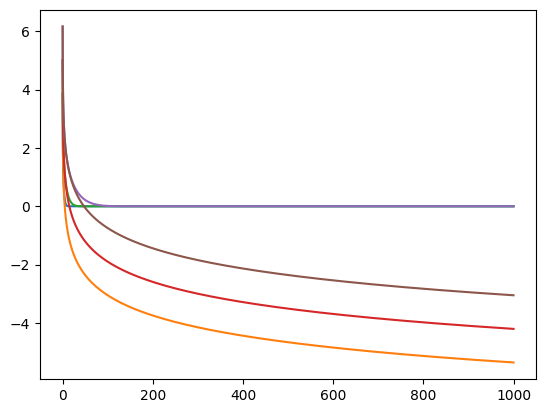

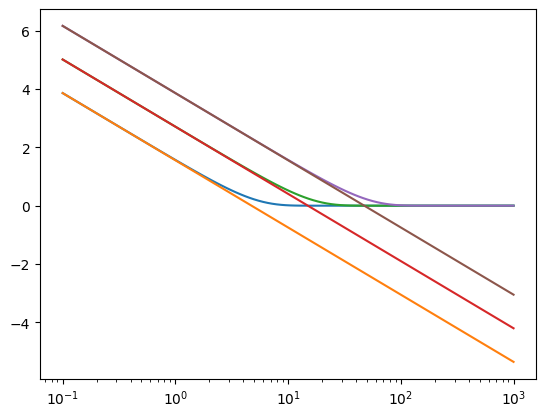

In [5]:
# зададим точки расстояний для отрисовки графика
rdl = np.logspace(-1, 3 , 100)

# построим первый график в обычных координатах
for td in [10, 100, 1000]:
    plt.plot(rdl, pd_ei(td, rdl))
    
    red = (td*2.2458)**0.5
    plt.plot(rdl, pd_ss(rdl,red))
plt.show()

# построим второй график в полулогарифмических координатах
for td in [10, 100, 1000]:
    plt.plot(rdl, pd_ei(td, rdl))
    
    red = (td*2.2458)**0.5
    plt.plot(rdl, pd_ss(rdl,red))
plt.xscale('log')
plt.show()

# 3 Задания для самостоятельной работы <a class="anchor" id="363"></a>

Для совершенствования навыков работы с python выполните следующие задания:

1. Постройте графики распределения давления в пласте в размерном виде
2. Исследуйте как зависит радиус влияния скважины от проницаемости и других параметров. Какие характерные величины будут для разных условий